In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

In [2]:
def delta(S, K, T, r, vol):
    
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    delta = - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)/ (vol * S * np.sqrt(T))
    
    return delta

In [3]:
delta (176,172,4/52,0.0163,0.707)

-0.01154151691320741

In [4]:
S = np.linspace(140,200,11)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 172, 4/52, 0.0163, 0.707)

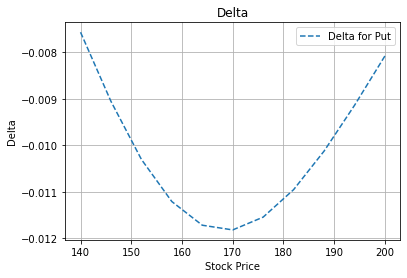

In [5]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

In [6]:
def gamma(S, K, T, r, vol):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = (np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0)) / ((vol ** 2) * (S ** 2) * T)
    
    return gamma

In [7]:
gamma(176,172,4/52,0.0163,0.707)

7.413574631219592e-05

In [8]:
S = np.linspace(100,250,12)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 172, 4/52, 0.0163, 0.707,)

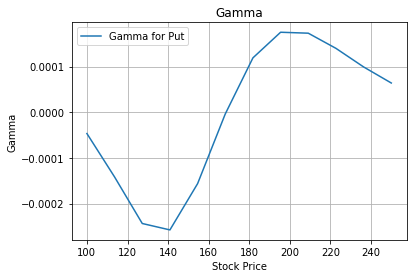

In [9]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [10]:
def speed(S,E,T,r,vol):
    d1= (np.log(S/E)+(r+0.5*vol**2)*T)/(vol*np.sqrt(T))
    d2= (np.log(S/E)+(r-0.5*vol**2)*T)/(vol*np.sqrt(T))
    speed_put= (np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0)/(vol**2*S**3*T))*(-2*d1+(1-(d1*d2))/(vol*np.sqrt(T)))
    return speed_put

In [11]:
speed(176,172,4/52,0.0163,0.707)

8.79297924708624e-06

In [12]:
S = np.linspace(100,250,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 172, 4/52, 0.0163, 0.707)

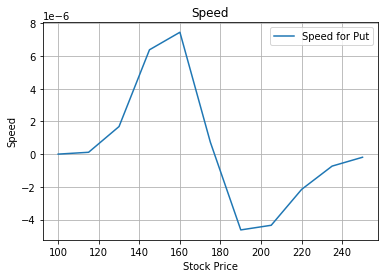

In [39]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

In [13]:
def theta(S, K, T, r,vol):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    theta = r * np.exp(-r * T) * (1 - si.norm.cdf(d2, 0.0, 1.0)) - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * ((d1/ 2 * T) - r/ vol * np.sqrt(T))
    
    return theta

In [14]:
theta(176,172,4/52,0.0163,0.707)

0.007124478653396872

In [15]:
T = np.linspace(0.25,3,12)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(176, 172, T[i], 0.0163,0.707)

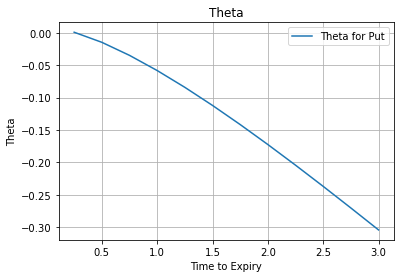

In [17]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

In [18]:
def vega(S, K, T, r, vol):
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega_put=(np.exp(-r * T)*si.norm.pdf(d2, 0.0, 1.0))*(np.sqrt(T))
    
    return vega_put

In [19]:
vega(176,172,4/52,0.0163,0.707)

0.11047184865724803

In [20]:
vol = np.linspace(0.1,0.9,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(176, 172, 4/52, 0.0163, vol[i])

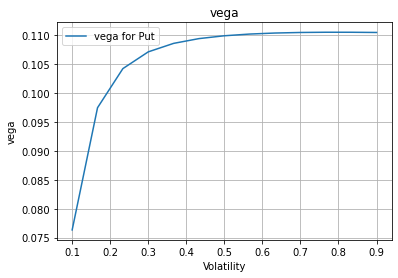

In [21]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('vega')
plt.title('vega')
plt.legend(['vega for Put'])

In [22]:
def rho(S,E,T,r,vol):
    
    d2= (np.log(S/E)+(r-0.5*vol**2)*T)/(vol*np.sqrt(T))
    rho = - T * np.exp(-r * T) * (1-si.norm.cdf(d2,0.0,1.0)) -(si.norm.cdf(- np.sqrt(T)/ vol)* np.exp(-r * T) * (1-si.norm.pdf(d2,0.0,1.0)))   
    
    return rho

In [23]:
rho(176,172,4/52,0.0163,0.707)

-0.24623301270583448

In [24]:
r = np.linspace(0,0.1,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(176, 172, 4/52, r[i], 0.707)

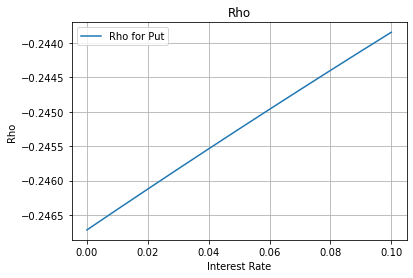

In [25]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])